In [1]:
!pip install emoji
!pip install nltk

## Dependancies and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import re
import string
import emoji

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shri4459","key":"c6009ed90dfbef3e194346809dab9c88"}'}

# Reading and preparation of data

In [4]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!kaggle datasets download -d dipankarmitra/natural-language-processing-with-disaster-tweets

Dataset URL: https://www.kaggle.com/datasets/dipankarmitra/natural-language-processing-with-disaster-tweets
License(s): unknown
  0% 0.00/607k [00:00<?, ?B/s]
100% 607k/607k [00:00<00:00, 896MB/s]


In [6]:
!unzip datasets/dipankarmitra/natural-language-processing-with-disaster-tweets

unzip:  cannot find or open datasets/dipankarmitra/natural-language-processing-with-disaster-tweets, datasets/dipankarmitra/natural-language-processing-with-disaster-tweets.zip or datasets/dipankarmitra/natural-language-processing-with-disaster-tweets.ZIP.


In [7]:
!unzip /content/natural-language-processing-with-disaster-tweets.zip

Archive:  /content/natural-language-processing-with-disaster-tweets.zip
  inflating: kaggle nlp/Natural Language Processing with Disaster Tweets (1).ipynb  
  inflating: kaggle nlp/sample_submission.csv  
  inflating: kaggle nlp/test.csv     
  inflating: kaggle nlp/train.csv    


In [8]:
train = pd.read_csv('/content/kaggle nlp/train.csv')
test=pd.read_csv('/content/kaggle nlp/test.csv')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [10]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [11]:
y = train['target']
train = train.drop(columns='target', axis=1)

In [12]:
train =train.drop(columns='id', axis=1)
test =test.drop(columns='id', axis=1)

In [13]:
train.isna().sum()


,0
keyword,61
location,2533
text,0


In [14]:
test.isna().sum()


,0
keyword,26
location,1105
text,0


In [15]:
train.fillna('0',inplace= True)
test.fillna('0',inplace=True)

In [16]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Cleaning

Removing unwanted text using regular expressions

In [17]:
stopwords_set = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(text):

    # Lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)

    # 3. Remove emojis
    text = emoji.replace_emoji(text, replace="")

    # 4. Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # 5. Remove numbers
    text = re.sub(r"\d+", "", text)

    # 6. Tokenize
    words = text.split()

    # 7. Remove stopwords
    words = [word for word in words if word not in stop_words]

    # 8A. Stemming
    stemmed_words = [stemmer.stem(word) for word in words]

    # 8B. Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(lemmatized_words)

# Data Preprocessing

In [18]:
train['clean_text'] = train['text'].apply(clean_tweet)
corpus = train['clean_text'].tolist()

In [19]:
corpus

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'resident asked shelter place notified officer evacuation shelter place order expected',
 'people receive wildfire evacuation order california',
 'got sent photo ruby alaska smoke wildfire pours school',
 'rockyfire update california hwy closed direction due lake county fire cafire wildfire',
 'flood disaster heavy rain cause flash flooding street manitou colorado spring area',
 'im top hill see fire wood',
 'there emergency evacuation happening building across street',
 'im afraid tornado coming area',
 'three people died heat wave far',
 'haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding',
 'raining flooding florida tampabay tampa day ive lost count',
 'flood bago myanmar arrived bago',
 'damage school bus multi car crash breaking',
 'whats man',
 'love fruit',
 'summer lovely',
 'car fast',
 'goooooooaaaaaal',
 'ridiculous',
 'london cool',
 'love skiin

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [21]:
tfid=TfidfVectorizer(max_features=4000)

In [24]:
X=tfid.fit_transform(corpus)

In [25]:
tfid.get_feature_names_out()[:100]

array(['aa', 'ab', 'aba', 'abandon', 'abandoned', 'abbswinston', 'abc',
       'abcnews', 'abe', 'abia', 'ability', 'ablaze', 'able', 'abomb',
       'abomination', 'abortion', 'absolutely', 'abstorm', 'abuse', 'ac',
       'access', 'accident', 'accidentally', 'accionempresa', 'according',
       'account', 'accused', 'accuses', 'acid', 'acre', 'across', 'act',
       'acting', 'action', 'activated', 'activates', 'active', 'activity',
       'actual', 'actually', 'acute', 'ad', 'add', 'added', 'adding',
       'address', 'admits', 'adult', 'advance', 'adventure', 'advisory',
       'af', 'affect', 'affected', 'affecting', 'afghan', 'afghanistan',
       'afraid', 'africa', 'african', 'afterlife', 'afternoon',
       'aftershock', 'age', 'agency', 'agent', 'ago', 'agree', 'agreed',
       'ah', 'ahead', 'ahh', 'aid', 'aim', 'aint', 'air', 'aircraft',
       'airline', 'airplane', 'airport', 'ak', 'aka', 'al', 'alabama',
       'alarm', 'alaska', 'alberta', 'album', 'alcohol', 'alert', 

In [26]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 53957 stored elements and shape (7613, 4000)>

In [27]:
tfidf_df = pd.DataFrame(X.toarray(), columns=tfid.get_feature_names_out())
tfidf_df.head()

,aa,ab,aba,abandon,abandoned,abbswinston,abc,abcnews,abe,abia,...,ûïa,ûïhatchet,ûïrichmond,ûïstretcher,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûó
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Spliting  Data into Train,Test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Training

In [29]:
clf = LogisticRegression(max_iter=300)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=300)

## Prediction on Test Data

In [30]:
y_pred=clf.predict(X_test)

## Accuracy

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8115561391989494

# Show Classification Report

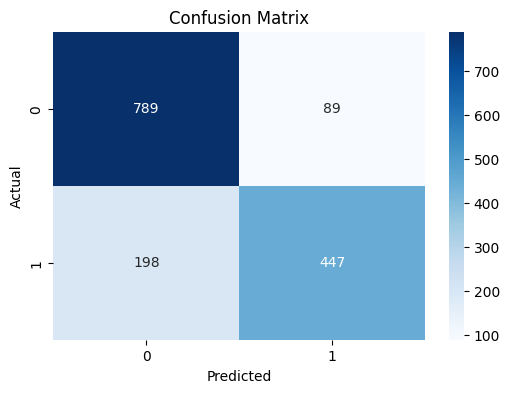

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [35]:
import pickle as pkl
pkl.dump(clf,open('model.pkl','wb'))